# **Stellar Luminosity – Polynomial Regression with Interaction**
-----
### **Introduction**

In the previous notebook, stellar luminosity was modeled using only stellar mass and a linear relationship.
However, real astrophysical systems often exhibit nonlinear behavior and multiple physical variables can
interact with each other.

In this notebook, we extend the linear regression model by incorporating additional features such as star
temperature, nonlinear terms and interaction effects.

### **Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### **Defie Datasets**

In [4]:
# Stellar mass (in solar masses)
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])

# Effective temperature (in Kelvin)
T = np.array([3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200])

# Stellar luminosity (in solar luminosities)
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])


### **Initial display**

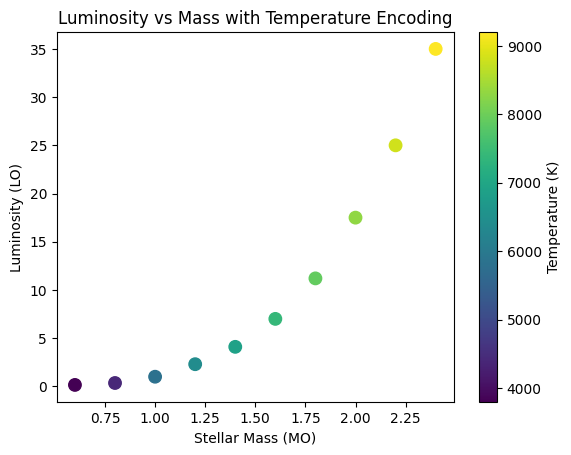

In [5]:
plt.scatter(M, L, c=T, cmap="viridis", s=80)
plt.colorbar(label="Temperature (K)")
plt.xlabel("Stellar Mass (MO)")
plt.ylabel("Luminosity (LO)")
plt.title("Luminosity vs Mass with Temperature Encoding")
plt.show()


The graph shows that luminosity increases rapidly with mass, but the relationship is clearly nonlinear.
Temperature varies with mass and luminosity, which tells us that the use of multiple characteristics
can improve the model.

### **Feature Engineering**



In [6]:
# Feature matrix 
X = np.column_stack([
    M,
    T,
    M**2,
    M * T
])


The feature matrix includes:
- M: linear dependence on stellar mass
- T: temperature contribution
- M²: nonlinear mass effects
- M·T: interaction between mass and temperature

These features allow the model to capture nonlinear and interaction effects.

### **Model**




In [7]:
def predict(X, w, b):
    return X @ w + b


### **Loss and vectorized gradients**

In [8]:
def compute_cost(X, y, w, b):
    m = len(y)
    predictions = predict(X, w, b)
    return np.mean((predictions - y) ** 2)

def compute_gradients(X, y, w, b):
    m = len(y)
    predictions = predict(X, w, b)
    error = predictions - y

    dj_dw = (2 / m) * (X.T @ error)
    dj_db = (2 / m) * np.sum(error)

    return dj_dw, dj_db


### **Training and convergence**

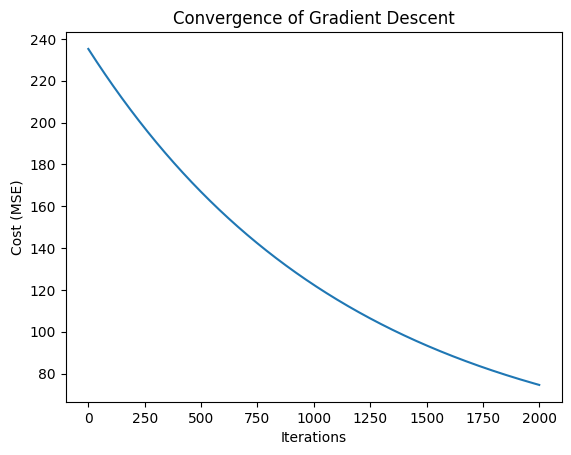

In [10]:
def gradient_descent(X, y, alpha, iterations):
    w = np.zeros(X.shape[1])
    b = 0.0
    cost_history = []

    for _ in range(iterations):
        dj_dw, dj_db = compute_gradients(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost_history.append(compute_cost(X, y, w, b))

    return w, b, cost_history

w_full, b_full, cost_history = gradient_descent(X, L, alpha=1e-12, iterations=2000)

plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Convergence of Gradient Descent")
plt.show()



The cost decreases slowly, indicating stable convergence of the optimization algorithm.

### **Feature selection experiment**

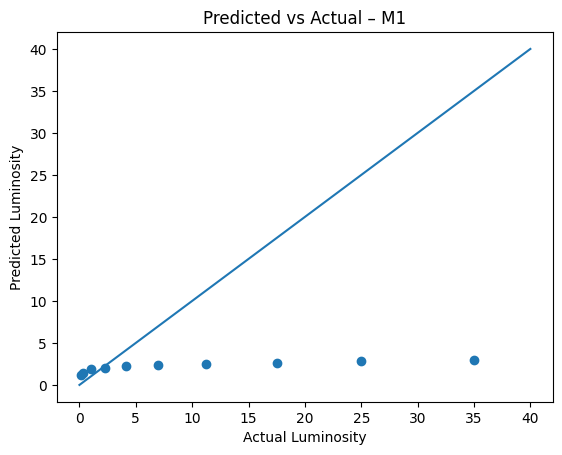

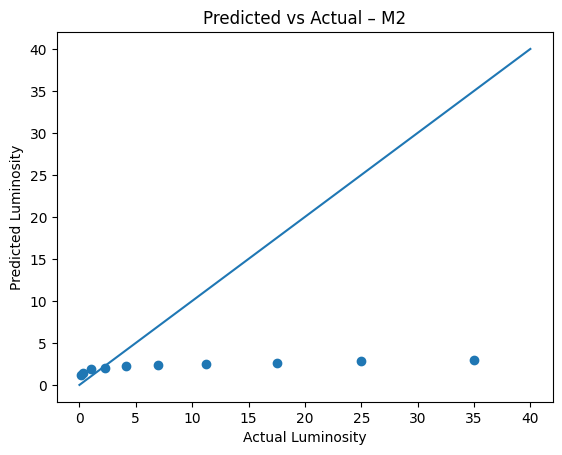

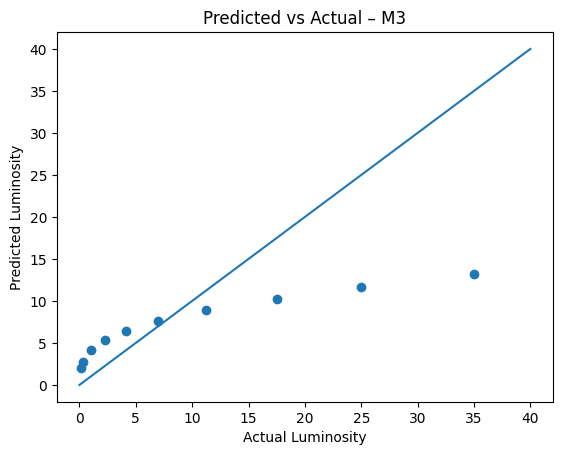

In [11]:
models = {
    "M1": np.column_stack([M, T]),
    "M2": np.column_stack([M, T, M**2]),
    "M3": np.column_stack([M, T, M**2, M*T])
}

results = {}

for name, X_model in models.items():
    w, b, history = gradient_descent(X_model, L, alpha=1e-12, iterations=2000)
    results[name] = (w, b, history[-1])

    predictions = predict(X_model, w, b)
    plt.scatter(L, predictions)
    plt.plot([0, 40], [0, 40])
    plt.xlabel("Actual Luminosity")
    plt.ylabel("Predicted Luminosity")
    plt.title(f"Predicted vs Actual – {name}")
    plt.show()


### **Cost vs interaction**


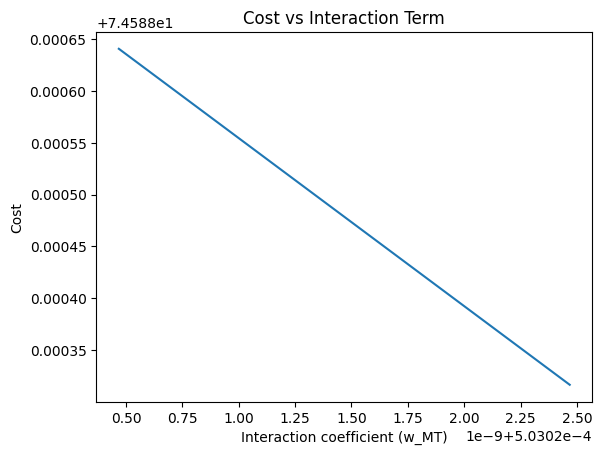

In [12]:
w_fixed, b_fixed, _ = gradient_descent(X, L, alpha=1e-12, iterations=2000)

w_mt_values = np.linspace(w_fixed[3] - 1e-9, w_fixed[3] + 1e-9, 50)
costs = []

for val in w_mt_values:
    w_temp = w_fixed.copy()
    w_temp[3] = val
    costs.append(compute_cost(X, L, w_temp, b_fixed))

plt.plot(w_mt_values, costs)
plt.xlabel("Interaction coefficient (w_MT)")
plt.ylabel("Cost")
plt.title("Cost vs Interaction Term")
plt.show()


The curvature of the cost function shows us that the interaction term significantly affects the performance of the model,
indicating that the mass-temperature interaction is important.

### **Inference**

In [14]:
M_new = 1.3
T_new = 6600

X_new = np.array([M_new, T_new, M_new**2, M_new*T_new])
L_pred = X_new @ w_full + b_full

L_pred


np.float64(5.793982693337595)

The predicted luminosity is reasonable given the mass and temperature of the star, and is consistent with
the observed trend in the dataset.
